# February Minor Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("voice.csv")
df.head()

print(df.shape)

x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(3168, 21)
(3168, 20)
(3168,)


### 1) Remove/handle null values (if any)

In [3]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [4]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

### 2) Depict percentage distribution of label on a pie chart

['female' 'male']
data_pie  [1 1 1 ... 0 0 0]


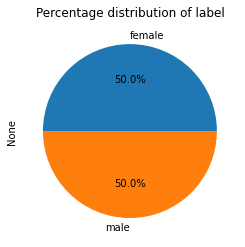

In [5]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()

labels = np.unique(df['label'])
print(labels)



data_pie = list(df['label'])
# print(data_pie)

data_pie = lb.fit_transform(data_pie)
print("data_pie ",data_pie)

data = df.groupby('label').size().plot(kind='pie',autopct = '%1.1f%%', title='Percentage distribution of label')


#plt.pie(data_pie, labels=labels, colors=['#1f77b4'], autopct = '%1.1f%%',shadow=True, startangle=90 )
#plt.axis('equal')
#plt.show()

### 3) Considering all the features as independent feature and label as dependent feature, split the dataset training and testing data with test size=20%

In [6]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.20)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


### 4) Apply the following classifier models on training dataset and generate predictions for the test dataset


### RandomForestClassifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
m1 = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5, min_samples_split=10)

m1.fit(x_tr, y_tr)

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=50)

In [9]:
# Accuracy

print("Training score: ", m1.score(x_tr,y_tr))
print("Testing score: ", m1.score(x_te, y_te))

Training score:  0.9810576164167324
Testing score:  0.9794952681388013


In [10]:
ypred_m1 = m1.predict(x_te)
# print(ypred_m1)

In [11]:
cm_m1 = confusion_matrix(y_te, ypred_m1)
print(cm_m1)
print(classification_report(y_te, ypred_m1))

[[294   7]
 [  6 327]]
              precision    recall  f1-score   support

      female       0.98      0.98      0.98       301
        male       0.98      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



### DecisionTreeClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
m2 = RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=10)

m2.fit(x_tr, y_tr)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=10)

In [14]:
# Accuracy

print("Training score: ", m2.score(x_tr,y_tr))
print("Testing score: ", m2.score(x_te, y_te))

Training score:  0.9779005524861878
Testing score:  0.9763406940063092


In [15]:
ypred_m2 = m2.predict(x_te)
# print(ypred_m1)

In [16]:
cm_m2 = confusion_matrix(y_te, ypred_m2)
print(cm_m2)
print(classification_report(y_te, ypred_m2))

[[291  10]
 [  5 328]]
              precision    recall  f1-score   support

      female       0.98      0.97      0.97       301
        male       0.97      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



### KNN classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
m3= KNeighborsClassifier(n_neighbors=17)

m3.fit(x_tr, y_tr)

KNeighborsClassifier(n_neighbors=17)

In [19]:
 # Accuracy

print("Training score: ", m3.score(x_tr,y_tr))
print("Testing score: ", m3.score(x_te, y_te))

Training score:  0.7324388318863457
Testing score:  0.7318611987381703


In [20]:
ypred_m3 = m3.predict(x_te)
# print(ypred_m1)

In [21]:
cm_m3 = confusion_matrix(y_te, ypred_m3)
print(cm_m3)
print(classification_report(y_te, ypred_m3))

[[214  87]
 [ 83 250]]
              precision    recall  f1-score   support

      female       0.72      0.71      0.72       301
        male       0.74      0.75      0.75       333

    accuracy                           0.73       634
   macro avg       0.73      0.73      0.73       634
weighted avg       0.73      0.73      0.73       634



### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
m4 = LogisticRegression(solver='liblinear')

m4.fit(x_tr, y_tr)

LogisticRegression(solver='liblinear')

In [24]:
 # Accuracy

print("Training score: ", m4.score(x_tr,y_tr))
print("Testing score: ", m4.score(x_te, y_te))

Training score:  0.9076558800315706
Testing score:  0.9227129337539433


In [25]:
ypred_m4 = m4.predict(x_te)
# print(ypred_m1)

In [26]:
cm_m4 = confusion_matrix(y_te, ypred_m4)
print(cm_m4)
print(classification_report(y_te, ypred_m4))

[[261  40]
 [  9 324]]
              precision    recall  f1-score   support

      female       0.97      0.87      0.91       301
        male       0.89      0.97      0.93       333

    accuracy                           0.92       634
   macro avg       0.93      0.92      0.92       634
weighted avg       0.93      0.92      0.92       634



### SVC classifier

In [27]:
from sklearn.svm import SVC

In [28]:
m5 = SVC(kernel="linear", C=1)

m5.fit(x_tr, y_tr)

SVC(C=1, kernel='linear')

In [29]:
 # Accuracy

print("Training score: ", m5.score(x_tr,y_tr))
print("Testing score: ", m5.score(x_te, y_te))

Training score:  0.9210734017363852
Testing score:  0.9337539432176656


In [30]:
ypred_m5 = m5.predict(x_te)
# print(ypred_m1)

In [31]:
cm_m5 = confusion_matrix(y_te, ypred_m5)
print(cm_m5)
print(classification_report(y_te, ypred_m5))

[[264  37]
 [  5 328]]
              precision    recall  f1-score   support

      female       0.98      0.88      0.93       301
        male       0.90      0.98      0.94       333

    accuracy                           0.93       634
   macro avg       0.94      0.93      0.93       634
weighted avg       0.94      0.93      0.93       634



### 6) Result

In [32]:
print("DecisionTree Accuracy: ",m2.score(x_te,y_te))
print("RandomForest Accuracy: ",m1.score(x_te,y_te))
print("KNNClassifer Accuracy: ",m3.score(x_te,y_te))
print("LogisticRegression Accuracy: ",m4.score(x_te,y_te))
print("SVMClassifier Accuracy: ",m5.score(x_te,y_te))

DecisionTree Accuracy:  0.9763406940063092
RandomForest Accuracy:  0.9794952681388013
KNNClassifer Accuracy:  0.7318611987381703
LogisticRegression Accuracy:  0.9227129337539433
SVMClassifier Accuracy:  0.9337539432176656


In [33]:
maxi = m1.score(x_te, y_te);
best = m1;
for i in [m1, m2, m3, m4, m5]:
    if i.score(x_te,y_te)>maxi:
        maxi = i.score(x_te,y_te)
        best = i

print("Best Suitable model is",best," and accuracy is ",maxi)


Best Suitable model is RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=50)  and accuracy is  0.9794952681388013
